In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

Path = os.getcwd()

In [17]:
#Experiment 1
transmission = [20, 40, 60, 80, 100] #percentage

blue = [1.483, 1.488, 1.491, 1.490, 1.491] # Volts
blue_off = [0.001, 0.001, 0.001, 0.001, 0.001] # Volts

red = [1.326, 1.384, 1.413, 1.423, 1.430] # Volts
red_off = [0.009, 0.007, 0.005, 0.003, 0.003] # Volts

#Experiment 2
colors= ['Red', 'Yellow', 'Green', 'Blue', 'Violet', 'Ultraviolet']
wave = [625, 578.000, 546.074, 435.835, 404.656, 365.483] # nm
freq = [480, 518.672, 548.996, 687.858, 740.858, 820.264] # 10^14 Hz

stopping_volt = [1.500, 0.752, 0.889, 1.499, 1.720, 2.032] # Volts
offset_volt = [0.001, 0.005, 0.005, 0.005, 0.001, 0.001] # Volts

In [31]:
# Now finding the residuals of Experiment 2
slope_red, intercept_red = np.polyfit(freq,stopping_volt, 1)

expected_red = []
residuals_red = []
for i in range(len(freq)):
    expected_red.append(freq[i]* slope_red + intercept_red)
    residuals_red.append((expected_red[i]-stopping_volt[i])) 


    
#Finding our residuals while removing Red
freq_rm = freq[1:]
stopping_volt_rm = stopping_volt[1:]

slope_rm, intercept_rm = np.polyfit(freq_rm,stopping_volt_rm, 1)

expected_rm = []
residuals_rm = []
for i in range(len(freq_rm)):
    expected_rm.append(freq_rm[i]* slope_rm + intercept_rm)
    residuals_rm.append((expected_rm[i]-stopping_volt_rm[i])) 


expected_rm = np.array(expected_rm)
    
xrange = np.linspace(470,830,100)

#Finding the Best Fit Line
y_red = xrange*slope_red + intercept_red
y_rm = xrange*slope_rm + intercept_rm

In [33]:
np.sum((stopping_volt_rm-expected_rm)**2)

0.0007129420061075399

The equation used to find the error of a linear regression slope:

\begin{equation}
    s(b_1) = \sqrt{\frac{1}{n-2} \frac{\Sigma (y_i - y_{exp})^2}{\Sigma (x_i - x_{avg})^2}}
\end{equation}

In [45]:
def Standard_error(x, y, y_predict):
    """"
    x y and y_predict must all be arrays with the same number of elements.
    Returns the error of the slope.
    """  
    
    n = len(x)
    x_avg = np.mean(x)
    top = np.sum((y-y_predict)**2)
    bot = np.sum((x-x_avg)**2)
    result  = np.sqrt(1/(n-2) * top/bot)
    return(result)

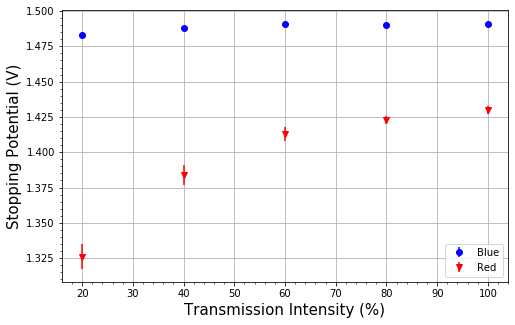

In [12]:
plt.figure(figsize = [8,5])
plt.errorbar(transmission,blue,yerr= blue_off,fmt='o', color = 'blue',label='Blue')
plt.errorbar(transmission,red,yerr= red_off,fmt='v', color = 'red',label='Red')
plt.legend()
plt.grid()
plt.xlabel("Transmission Intensity (%)", size = 15)
plt.ylabel("Stopping Potential (V)", size = 15)
plt.minorticks_on()
plt.savefig(Path + "/Exp1_data.png",bbox_inches='tight')
plt.show()

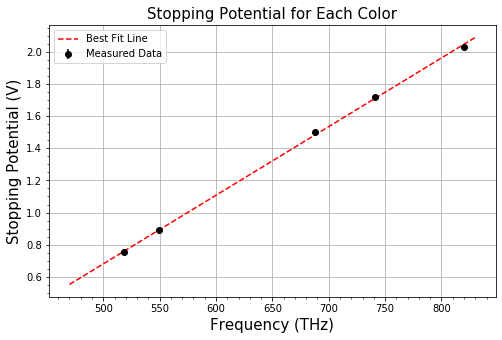

In [21]:
plt.figure(figsize = [8,5])
plt.errorbar(freq[1:],stopping_volt[1:],yerr = offset_volt[1:], fmt='o', color = 'black',label='Measured Data')
#plt.errorbar(transmission,red,yerr= red_off,fmt='v', color = 'red',label='red')
#plt.plot(xrange,y_red,'--',c='red',label='Best Fit Line with Red')
#plt.plot(xrange,y_rm,'--',c='blue',label='Best Fit Line removing Red')
plt.plot(xrange,y_rm,'--',c='red',label='Best Fit Line')
plt.legend()
plt.grid()
plt.xlabel("Frequency (THz)", size = 15)
plt.ylabel("Stopping Potential (V)", size = 15)
plt.title("Stopping Potential for Each Color", size = 15)
plt.minorticks_on()
plt.savefig(Path + "/he data.png",bbox_inches='tight')
plt.show()

In [47]:
he_err

6.035508194114566e-17

In [48]:
he_obs = (slope_rm/10e14)*1000
he_err = (Standard_error(freq_rm,stopping_volt_rm,expected_rm)/10e14)*1000
he_know = 4.1357e-15

offset = (he_obs-he_know)/he_know

print("Removing Red, we measured the h/e to be "+str(he_obs)+" J/A")
print("The error to this measurment is "+str(he_err)+" J/A")
print("This measurement is off the known h/e value by "+str(round(offset*100,3))+"%")

Removing Red, we measured the h/e to be 4.270204012781824e-15 J/A
The error to this measurment is 6.035508194114566e-17 J/A
This measurement is off the known h/e value by 3.252%


In [58]:
he_obs_red = (slope_red/10e14)*1000
he_know = 4.1357e-15

offset_red = (he_obs_red-he_know)/he_know

print("Including Red, we measured the h/e to be "+str(he_obs_red)+" J/A")
print("This measurement is off the known h/e value by "+str(round(offset_red*100,3))+"%")

Including Red, we measured the h/e to be 2.788354122169189e-15 J/A
This measurement is off the known h/e value by -32.578%


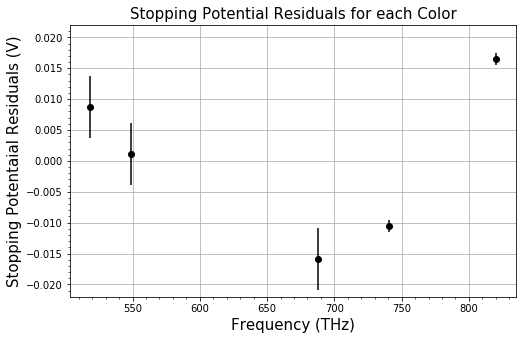

In [22]:
plt.figure(figsize = [8,5])
plt.errorbar(freq_rm,residuals_rm,yerr=offset_volt[1:],fmt ='o',color = 'black')
plt.grid()
plt.xlabel("Frequency (THz)", size = 15)
plt.ylabel("Stopping Potentaial Residuals (V)", size = 15)
plt.minorticks_on()
plt.title("Stopping Potential Residuals for each Color", size = 15)
plt.ylim(-0.022,0.022)
plt.savefig(Path + "/he residuals.png",bbox_inches='tight')
plt.show()

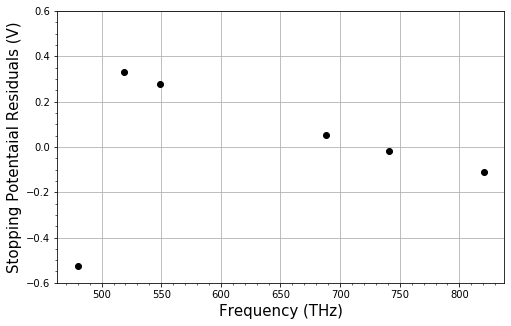

In [42]:
plt.figure(figsize = [8,5])
plt.errorbar(freq,residuals_red,yerr=offset_volt,fmt ='o',color = 'black')
plt.grid()
plt.xlabel("Frequency (THz)", size = 15)
plt.ylabel("Stopping Potentaial Residuals (V)", size = 15)
plt.minorticks_on()
plt.ylim(-0.6,0.6)
plt.savefig(Path + "/Exp2_residuals_red.png",bbox_inches='tight')
plt.show()